In [26]:
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
df = pd.read_csv('data.csv/data.csv')

In [50]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [51]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [52]:
X = df.drop(['cut', 'depth', 'table','price'], axis=1)
y = df['price']

In [53]:
rf = RandomForestRegressor()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [56]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
rf.score(X_test, y_test)

0.979715987227852

In [58]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [59]:
feature_importances

,importance
y,0.529165
carat,0.361497
clarity,0.063358
color,0.030376
z,0.008785
x,0.006819


In [60]:
df = pd.DataFrame(rf.predict(X_test), columns = ['pred'])
df['gt'] = y_test.reset_index(drop=True)

In [61]:
df.sort_values(by='gt', ascending=False)

,pred,gt
1249,17067.860,18818
1860,17935.490,18797
3946,17244.860,18779
3801,16178.340,18745
5419,16269.970,18710
...,...,...
6530,367.000,367
2763,399.790,363
5691,380.820,348
5528,387.235,339


In [62]:
round(np.sqrt(metrics.mean_squared_error(df["gt"],df['pred'])),4)

574.3347

In [13]:
fs = FeatureSelector(data = X, labels = y)

In [15]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [31]:
fs.identify_collinear(correlation_threshold = 0.98)

0 features with a correlation magnitude greater than 0.98.



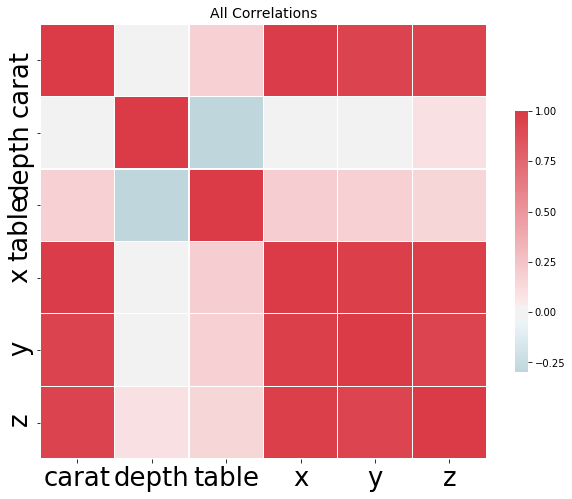

In [32]:
fs.plot_collinear(plot_all = True)

In [37]:
# # fs.identify_zero_importance(task = 'regression', 
#                             eval_metric = 'auc', 
#                             n_iterations = 10, 
#                              early_stopping = True)

In [ ]:
model = XGBClassifier()
model.fit(X, y)

In [ ]:
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
plot_importance(model)
pyplot.show()

In [ ]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))